<h2><u><font color='red'>HR Attrition Project- </font>Evaluation Project-3

<h2><i><font color ='red'>Brief:

<h4><font color='brown'>
<br><br>1. The Dataset was imported and analysed for missing values, and used the info() function to check the datatype of the columns. 
    
<br><br>2. The Datatype wasnt enough to say if a column was categorical or continious, as there were a lot of columns with ratings.
<br><br>3. We Understood the behaviour of the columns on the target, with the use of visualisation techniques and some common logic. The columns that i was unclear about, i ran an individual analysis, rest were visualised using a heatmap.
<br><br>4. Next we saw if the dataset was Balanced, it was imbalanced. We can later check if the same proportion exists in the training and testing data.
<br><br>5. Segregated the Categorical and Continious data columns.
<br><br>6. Next, we use the function get_dummies() to indicator values for better classification.
<br><br>7. Next we split the data into training and testing data, and then we check, to find the imbalance is in the same proportion in both training and testing data.
<br><br>8. Used the Decision Tree model for this dataset. began with initialising the pipeline, checked the Cross validation score  of the pipeline. where we found an accuracy of  84.3%
<br><br>9. Began hyper parameter tuning for better accuracy/efficiency/both. Then checked the Cross validation score using Grid search CV, where we got the best score of 84.75%
<br><br>10. We Visualised the Tree. Uploaded a higher resolution in the folder for your reference.
<br><br>11. Finally, conducted Model Evaluation. the following are the results.

In [162]:
print(metrics.classification_report(DTC_test_pred.actual,DTC_test_pred.predicted))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       309
           1       0.53      0.31      0.39        59

    accuracy                           0.85       368
   macro avg       0.70      0.63      0.65       368
weighted avg       0.82      0.85      0.83       368



<h4><font color='brown'>
As we can see, in the Macro Average row, we have a Recall pf 0.63,Precision of 0.70 and f1 score of 0.65
    

<h2><font color='blue'><u>PYTHON IMPLEMENTATION

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.datasets import make_classification
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import power_transform,PowerTransformer
from sklearn.preprocessing import power_transform as PT
from scipy.stats import zscore
import plotly.offline as py
import plotly.graph_objs as go
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import joblib
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve
import pandas_profiling
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

<h3><font color='maroon'>Read Data and conduct initial Observations

In [6]:
data= pd.read_csv(r"C:\Users\Glenn\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv",header=0)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [7]:
#looking for Null values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
##Lets now check the Type of data we are dealing with
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<h3><font color='maroon'>Now lets begin our Exploratory Data Analysis(EDA)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [10]:
#Lets now label encode the Target/Label as 1's and 0's for the machine to understand better.
LE = LabelEncoder()
data['Attrition']= LE.fit_transform(data['Attrition'])

In [11]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Lets understand the reaction of the target with feature segments.
Since the dataset has a mixture of categorical an continous columns. we have to visualise them using different kinds of plots.

In [12]:
#creating functions 
def Cont_plots(dfrme,feature_n,label = "Attrition"):
  
    
    fig, ax = plt.subplots(ncols= 2, figsize = (9,4))    

    #distribution plot
    ax[1].set_title("Distribution of "+feature_n)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = dfrme[feature_n], ax=ax[1], kde=False)
    
     #boxplot for comparison
    sns.boxplot(x = label, y = feature_n, data=dfrme, ax=ax[0])
    ax[0].set_title("Relationship between " + feature_n + " vs " + label)
    
    plt.show()

In [13]:
def Discrete_plots(dfrme, feature_c,invert_axis = False, label = "Attrition"):
    
 
    
    fig, ax = plt.subplots(ncols= 2, figsize = (9,4))

    
  
    if invert_axis == False:
        sns.barplot(x = feature_c, y = label ,data=dfrme,ci=None)
    else:
        sns.barplot(y = feature_c, x = label ,data=dfrme,ci=None)
        
        
    if invert_axis == False:
        sns.countplot(x = feature_c, data=dfrme,hue="Attrition",ax=ax[0])
    else:
        sns.countplot(y = feature_c, data=dfrme,hue="Attrition",ax=ax[0])
        
    ax[0].set_title("Relationship between " + feature_c + " vs " + label)    
    ax[1].set_title("Attrition rate by {}".format(feature_c))
    ax[1].set_ylabel("Average(Attrition)")
    plt.tight_layout()

    plt.show()

Now that the functions for plotting the Continous and discrete columns are set, we can start analysing the response btw feature vs label

plotting individual comparisions for columns i had no proper understading of. for the rest, we can understand using corr() and visualise them using a heat map and cluster plot

<h3><font color='maroon'>Analysing the Continious Data columns

<h4><font color='brown'>1. Age

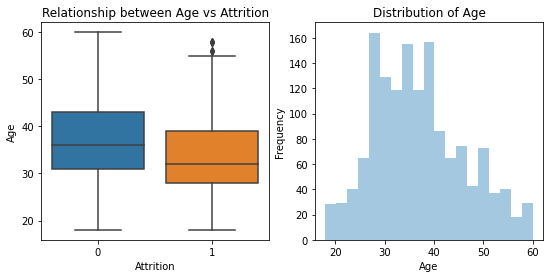

In [14]:
Cont_plots(data,feature_n="Age")

1.From the Describe function and the above plot it is clear that the median age of employee's in the company is 28 - 40 Yrs. Minimum age is 18 Yrs and Maximum age is 60 Yrs.
2.From the Age Comparision boxplot, people who left the company are between the ages:28-39. 

<h4><font color='brown'>2.Relationship between Monthly income and Attrition

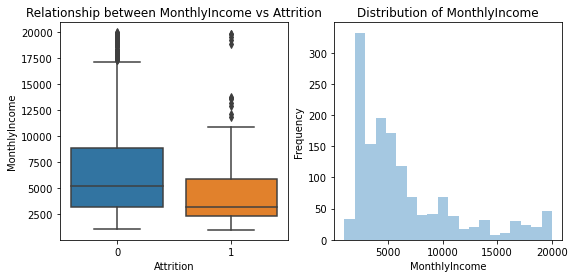

In [15]:
Cont_plots(data,feature_n="MonthlyIncome")

1. we can infer that employees working with lower monthly income tend to leave the company. 
2. Since no proper column information was given, few of the column names are a little ambigious to understand what it means, hence lets look at Daily rate and hourly rate to see if they are similar to monthly rate and its relationship with the attrition.

<h4><font color='brown'>2a.Relationship between Hourly Rate and Attrition

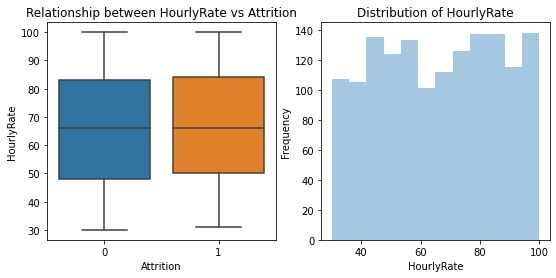

In [16]:
Cont_plots(data,feature_n="HourlyRate")

<h4><font color='brown'>2b.Relationship between Daily Rate and Attrition

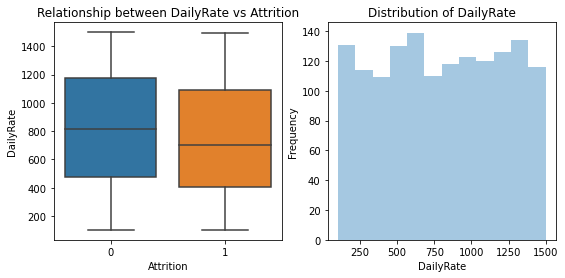

In [17]:
Cont_plots(data,feature_n="DailyRate")

1. It is clear from the above two plots that, while Hourly rate has nothing or very less to do with attrition, we cant say the same for Daily rate. Daily rate seems to have an impact on attrition when there is a decrease in 300-400 units.

<h4><font color='brown'>3.Salary Hike Percentage:

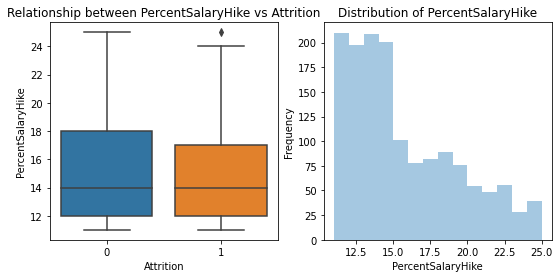

In [18]:
Cont_plots(data,feature_n="PercentSalaryHike")

Salary Hike also has a relationship with attrition, employees with a less salary hike, left the company.

<h4><font color='brown'>4.Total Working years:

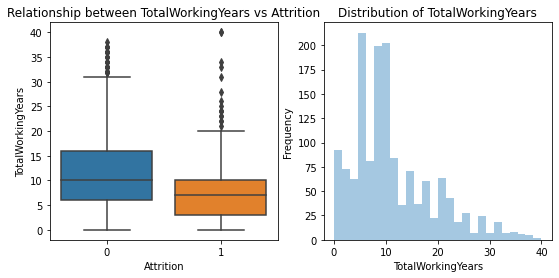

In [19]:
Cont_plots(data,feature_n="TotalWorkingYears")

Employees with more Years of Experience are more stable. only the ones with lesser expereince tend to quit.

<h3><font color='maroon'>Analyizing the Categorical columns

<h4><font color='brown'>1.Job Involvement

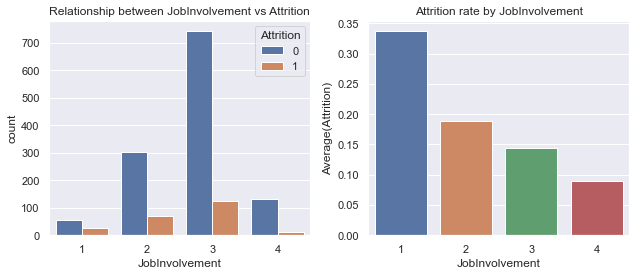

In [38]:
Discrete_plots(data, feature_c='JobInvolvement')

We can say that employees with low Job involvement have left the comapny.

<h4><font color='brown'>2. Job Satisfaction

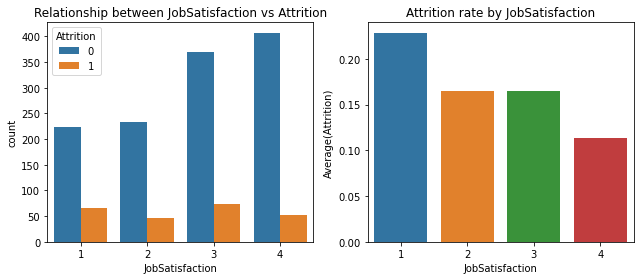

In [20]:
Discrete_plots(data, feature_c='JobSatisfaction')

Ofcourse, as logic dictates, employess with lesser job Satisfaction, left their jobs. but we can also see that, a sizable portion of the people who have an average and even above average satisfaction score also decided to leave. <br><br>
clearly there must be some other reason for the same.

<h4><font color='brown'>3.Performance rating

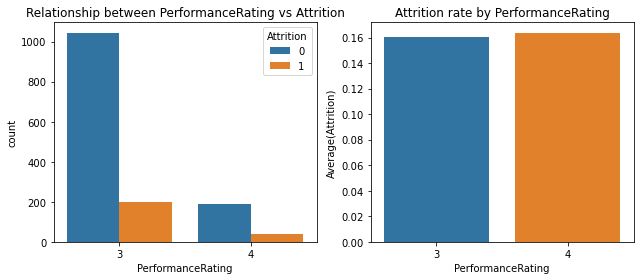

In [21]:
Discrete_plots(data, feature_c='PerformanceRating')

Performance rating doesnt really make alot difference atleast by itself, there are a sizable set of people from both ratings, proportionately who have left. <br><br>
Maybe this along with some other factor(s) are causing this.. Let us explore..

<h4><font color='brown'>4.Relationship Satisfaction

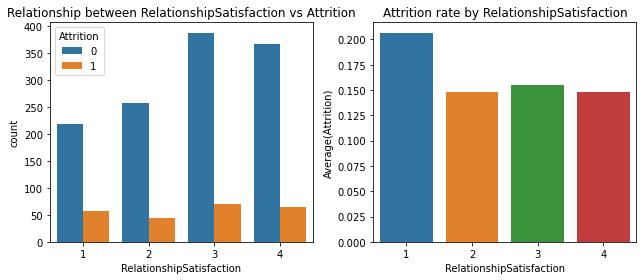

In [22]:
Discrete_plots(data, feature_c='RelationshipSatisfaction')

Even here, it is te same thing as above. there is no pattern as such to follow.

<h4><font color='brown'>5. WorkLife Balance

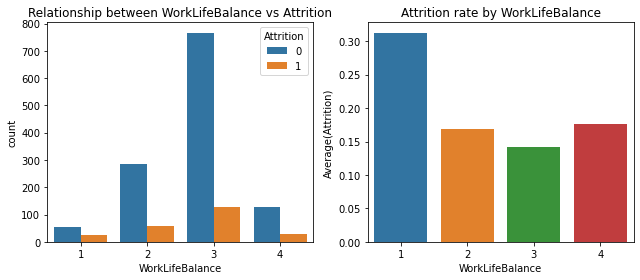

In [23]:
Discrete_plots(data, feature_c='WorkLifeBalance')

Now we are getting somewhere, we can see that employees with a bad work-lofe balance have double the chances of leaving as opposed to the ones that have a good balance.

<h4><font color='brown'>6. OverTime

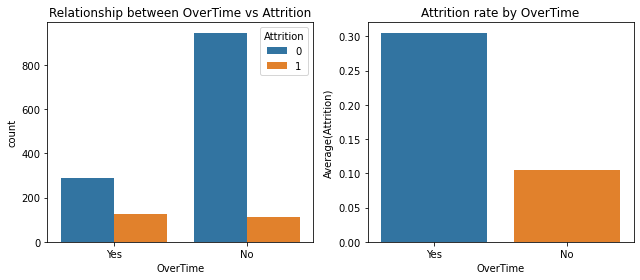

In [24]:
Discrete_plots(data, feature_c='OverTime')

This here is a strong motivating factor for employees to leave. Majority of the Employees who have worked OVertime have left.<br><br>
All though people who havnt experienced OT have also left, it is a very low margin.
<br>This seems to be a strong factor.
<br><br><h3><font color='brown'>Let us discuss the remaining features using a heatmap

<AxesSubplot:>

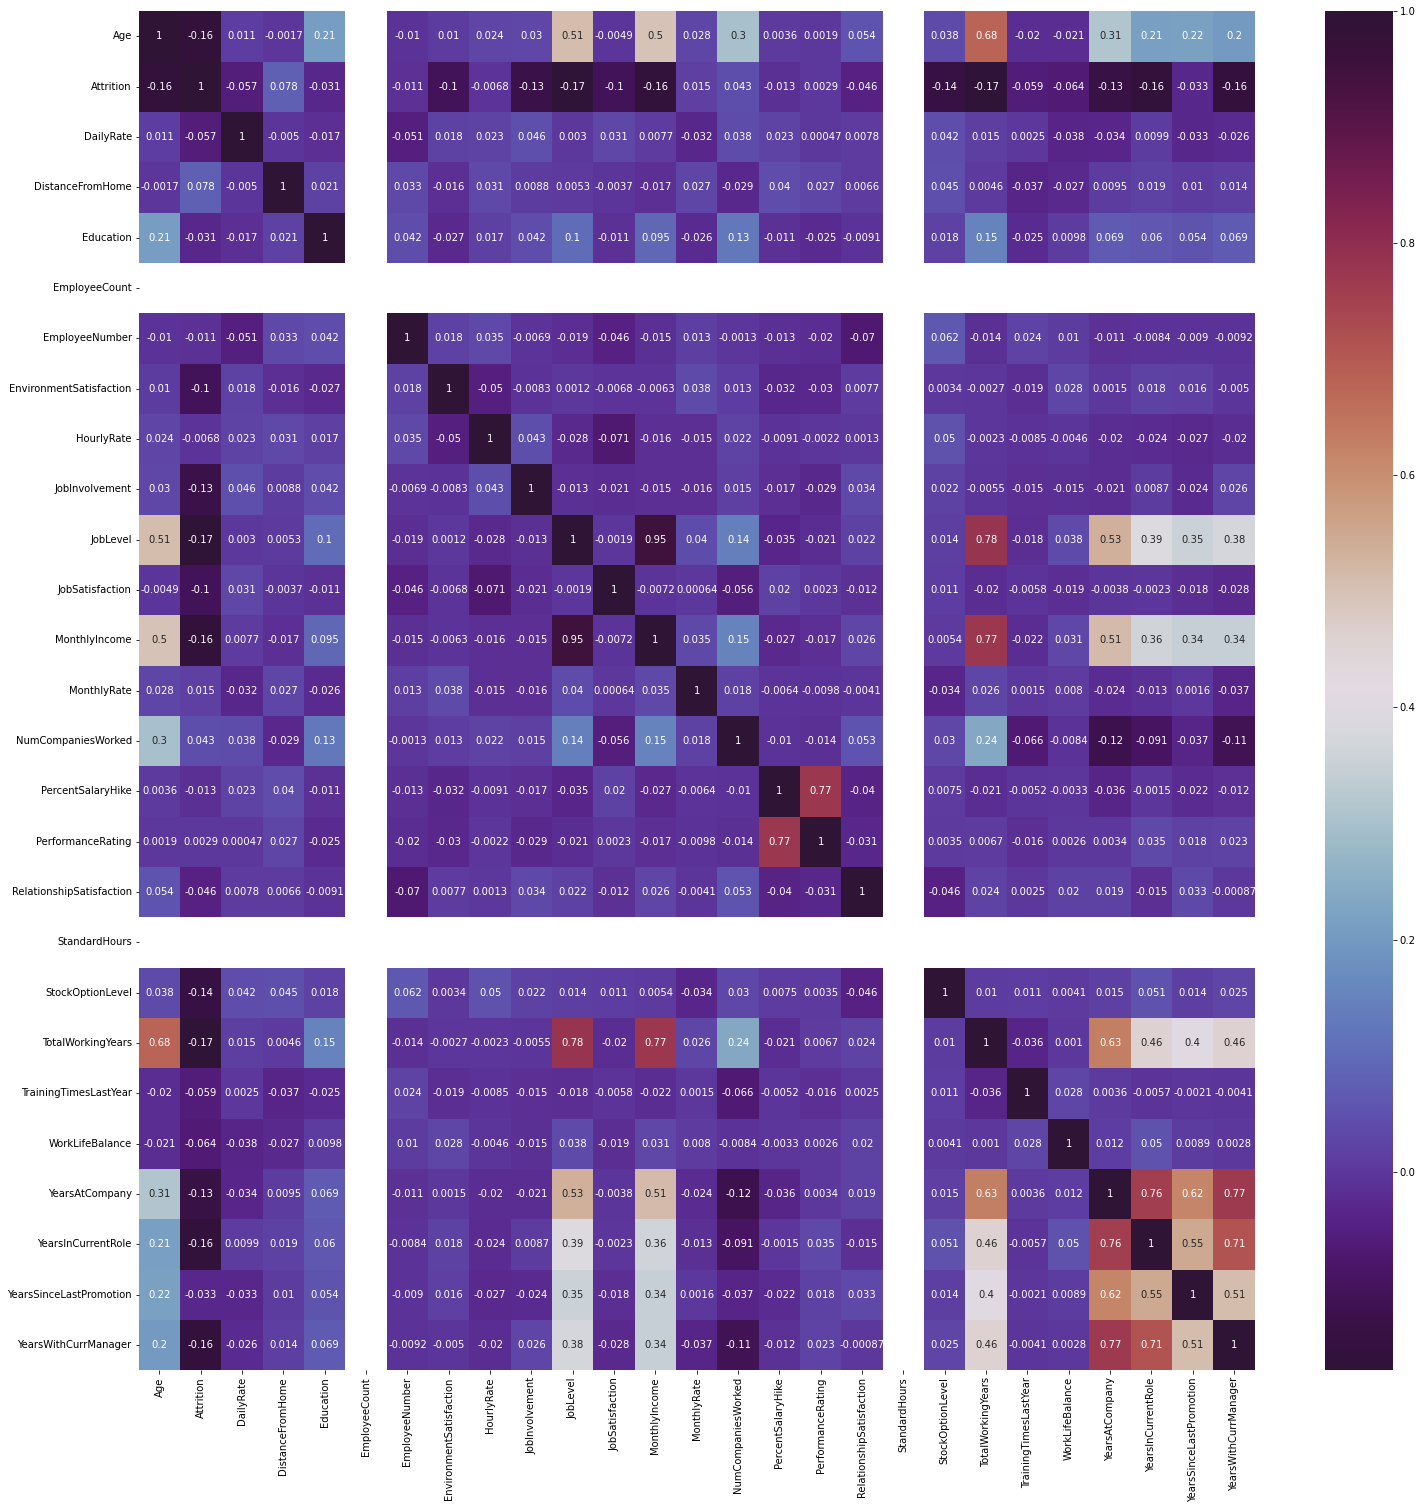

In [26]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),cmap='twilight_shifted',annot=True)

Some features like employee count standard hours can be dropped as they are nominal data and the latter is the same for all.

In [27]:
#EmployeeCount, EmployeeNumber, Gender, HourlyRate, JobLevel, MaritalStatus, Over18, StandardHours are insignificant and will be dropped
data.drop(['Gender','HourlyRate','JobLevel','MaritalStatus','Over18','StandardHours','EmployeeNumber','EmployeeCount'], axis = 1, inplace = True)


<AxesSubplot:>

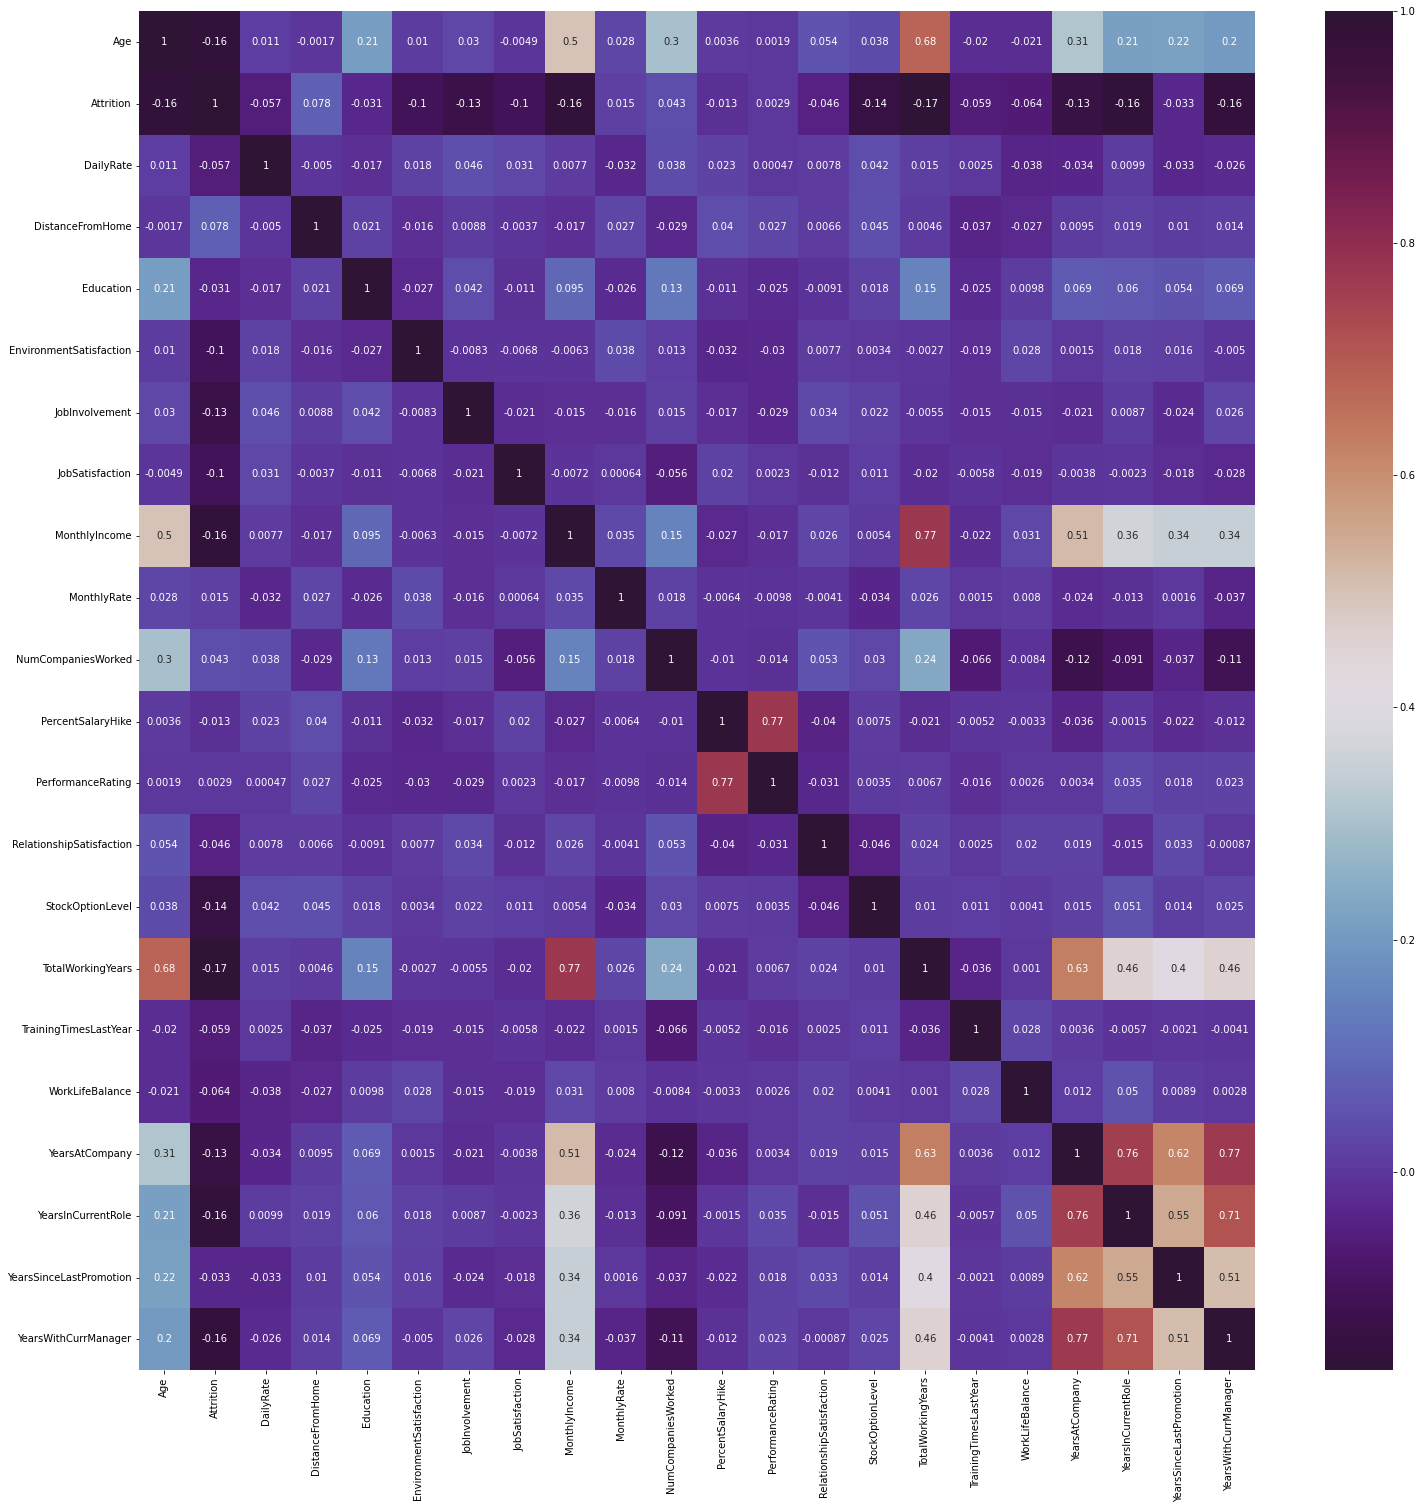

In [28]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),cmap='twilight_shifted',annot=True)

<h4><font color='brown'>Lets see if the Data is balanced.

In [30]:
data["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

1.Dataset is imbalanced.

2.Before We look at Model Building, Lets segregate the Categorical and Continous data columns.<br>
3. And Convert the cat columns into 1's and 0's using get dummies function.

In [31]:
dict(data.dtypes)

{'Age': dtype('int64'),
 'Attrition': dtype('int32'),
 'BusinessTravel': dtype('O'),
 'DailyRate': dtype('int64'),
 'Department': dtype('O'),
 'DistanceFromHome': dtype('int64'),
 'Education': dtype('int64'),
 'EducationField': dtype('O'),
 'EnvironmentSatisfaction': dtype('int64'),
 'JobInvolvement': dtype('int64'),
 'JobRole': dtype('O'),
 'JobSatisfaction': dtype('int64'),
 'MonthlyIncome': dtype('int64'),
 'MonthlyRate': dtype('int64'),
 'NumCompaniesWorked': dtype('int64'),
 'OverTime': dtype('O'),
 'PercentSalaryHike': dtype('int64'),
 'PerformanceRating': dtype('int64'),
 'RelationshipSatisfaction': dtype('int64'),
 'StockOptionLevel': dtype('int64'),
 'TotalWorkingYears': dtype('int64'),
 'TrainingTimesLastYear': dtype('int64'),
 'WorkLifeBalance': dtype('int64'),
 'YearsAtCompany': dtype('int64'),
 'YearsInCurrentRole': dtype('int64'),
 'YearsSinceLastPromotion': dtype('int64'),
 'YearsWithCurrManager': dtype('int64')}

*Instead of typing out all the column names, we will split it by using simple arguments of the Dictionary function.<br>
*And once we get the Column names into the categories of categorical and continious data, we can simply take on the rows/records from the dataset

In [32]:
continous  = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

categorical= [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ["object"]]

In [33]:
#store the numerical variables data in seperate dataset

Continious_data = data[continous]
Continious_data.drop('Attrition',axis=1,inplace=True)

In [34]:
Categirical_data = data[categorical]


In [35]:
Categorical = pd.get_dummies(Categirical_data)

In [36]:
dataset = pd.concat([Continious_data,Categorical, data["Attrition"]],axis=1)

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   JobInvolvement                     1470 non-null   int64
 6   JobSatisfaction                    1470 non-null   int64
 7   MonthlyIncome                      1470 non-null   int64
 8   MonthlyRate                        1470 non-null   int64
 9   NumCompaniesWorked                 1470 non-null   int64
 10  PercentSalaryHike                  1470 non-null   int64
 11  PerformanceRating                  1470 non-null   int64
 12  RelationshipSatisfac

<h4><font color='brown'>Separating the Target and the Features

In [41]:
#seperating the target and Features

X = dataset.drop(['Attrition'],axis=1)
Y=dataset["Attrition"]

In [42]:
X.shape

(1470, 44)

<h4><font color='brown'>Splitting data fro training and testing 

In [43]:
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size = 0.25,stratify = Y,random_state = 100)

In [44]:
#Now looking at the Imbalance issue of the dataset
#Proportion in training data
train_att=y_train.value_counts()/len(y_train)
test_att=y_test.value_counts()/len(y_test)
print(f'The imbalance in training set is \n',train_att)
print(f'The imbalance in testing set is \n',test_att)

The imbalance in training set is 
 0    0.838475
1    0.161525
Name: Attrition, dtype: float64
The imbalance in testing set is 
 0    0.839674
1    0.160326
Name: Attrition, dtype: float64


Both have same proportion of 1 and 0's

<h4><font color='brown'> Initialising Pipeline for Decision Tree Classifier

In [45]:
pipelines = {"clf": make_pipeline(DecisionTreeClassifier(max_depth=3,random_state=100))}

<h4><font color='brown'>Cross Validation Score-</font></h4><br>
Let us Check the accuracy of the pipeline

In [46]:
scores = cross_validate(pipelines['clf'], X_train, y_train,return_train_score=True)

In [47]:
scores['test_score'].mean()

0.8430028794734679

whichh means the Average Accuracy is about 84.3%.
It can be improved  by using Hyper Parameter tuning

<h4><font color='brown'>Cross-Validation and Hyper Parameters Tuning

In [48]:
decisiontree_hyperparameters = {
    "decisiontreeclassifier__max_depth": np.arange(3,12),
    "decisiontreeclassifier__max_features": np.arange(3,10),
    "decisiontreeclassifier__min_samples_split": [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "decisiontreeclassifier__min_samples_leaf" : np.arange(1,3)
}
pipelines['clf']

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, random_state=100))])

Desicion Tree Classifier fine tuned using Cross validation parameters.

Lets hope the Accuracy improves... as chances are either efficiency or accuracy can improve, or both.

<h4><font color='brown'>Using Grid search CV for the Cross Validation

In [50]:
clf_model = GridSearchCV(pipelines['clf'], decisiontree_hyperparameters, cv=5, n_jobs=-1)

In [52]:
#fit the model with train data
clf_model.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(max_depth=3,
                                                               random_state=100))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'decisiontreeclassifier__max_features': array([3, 4, 5, 6, 7, 8, 9]),
                         'decisiontreeclassifier__min_samples_leaf': array([1, 2]),
                         'decisiontreeclassifier__min_samples_split': [2, 3, 4,
                                                                       5, 6, 7,
                                                                       8, 9, 10,
                                                                       11, 12,
                                                                       13, 14,
                                                                       15]})

In [53]:
#Displaying the Best Parameters and scores....
clf_model.best_params_

{'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__max_features': 7,
 'decisiontreeclassifier__min_samples_leaf': 2,
 'decisiontreeclassifier__min_samples_split': 13}

In [54]:
clf_model.best_score_

0.847531879884821

In [55]:
#In Pipeline we can use the string names to get the decisiontreeclassifer

clf_model.best_estimator_.named_steps['decisiontreeclassifier']


DecisionTreeClassifier(max_depth=5, max_features=7, min_samples_leaf=2,
                       min_samples_split=13, random_state=100)

In [56]:
#saving incase we want to generate the tree.

clf_best_model = clf_model.best_estimator_.named_steps['decisiontreeclassifier']

<h4><font color='brown'>Visualisation of Decision Tree

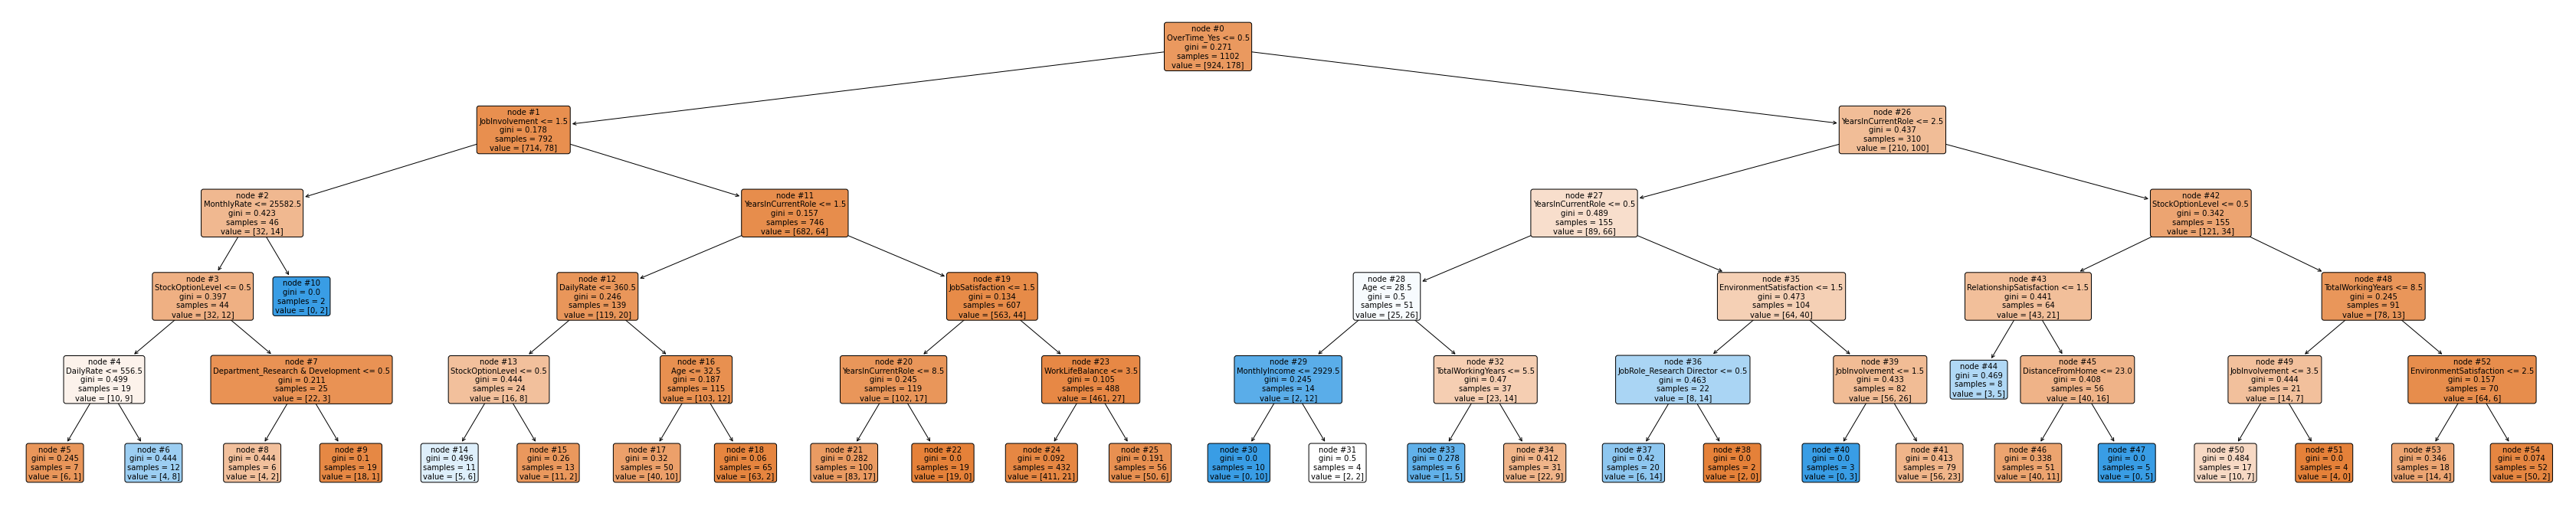

In [159]:
plt.figure(figsize=(60,12))
tree.plot_tree(clf_best_model,feature_names=X_train.columns.values,filled=True,node_ids=True,rounded=True,fontsize=10)
plt.savefig('tree_high_dpi', dpi=100)

<h3><font color='brown'>Model Performance Evaluation

We have now done our best, let us see what fruit this has yielded

In [57]:
tree_test_pred = pd.concat([y_test.reset_index(drop = True),pd.DataFrame(clf_model.predict(X_test))],axis=1)
tree_test_pred.columns = ["actual","predicted"]

#setting the index to original index
tree_test_pred.index = y_test.index
tree_test_pred.sample(10)

,actual,predicted
356,0,0
834,0,0
595,1,0
561,0,0
964,0,0
262,0,0
1133,0,0
1308,0,1
148,0,0
47,0,0


In [58]:
#Lets look at only one outcome P.. as we know, if now for P it is (1-P)

pred_probability = pd.DataFrame(p[1] for p in clf_model.predict_proba(X_test))
pred_probability.columns = ["predicted_prob"]
pred_probability.index = y_test.index

<h4><font color='brown'>Now lets look at the result in a dataframe

In [68]:
DTC_test_pred = pd.concat([tree_test_pred,pred_probability],axis=1)
DTC_test_pred.tail(10)

,actual,predicted,predicted_prob
524,0,0,0.107143
782,0,0,0.170000
429,0,0,0.048611
1305,0,0,0.030769
66,0,0,0.048611
784,0,0,0.048611
563,0,0,0.048611
89,1,0,0.048611
95,0,0,0.048611
584,0,0,0.048611


Now, there are bound to be some misjudgements like in row number 89. <br><br>
For this let us look at the confusion matrix for clarity about the truth classes.
<br>Lets also visualise it for better understanding

<h4><font color='brown'>Confusion Matrix

In [72]:
#confusion matrix
metrics.confusion_matrix(DTC_test_pred.actual,DTC_test_pred.predicted,labels=[1,0])

array([[ 18,  41],
       [ 16, 293]], dtype=int64)

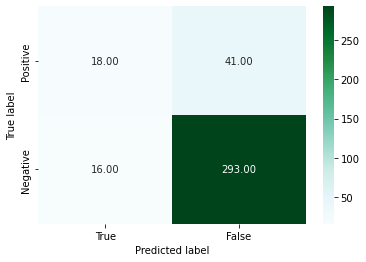

In [76]:
sns.heatmap(metrics.confusion_matrix(DTC_test_pred.actual,DTC_test_pred.predicted,
                                    labels=[1,0]),cmap="BuGn",annot=True,fmt=".2f",
           xticklabels = ["True", "False"] , yticklabels = ["Positive", "Negative"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

While we need to be very careful as to what metrics to be used for evaluating the model on such a Dataset.
<br>Area under ROC is a very important metric.
<br>Lets see what it says

In [84]:
roc_score_test = metrics.roc_auc_score(DTC_test_pred.actual,DTC_test_pred.predicted)
print("Area under ROC Score:",round(roc_score_test,4))


Area under ROC Score: 0.6267


<h4><font color='brown'>Lets plot the ROC to get an idea of the area under the curve

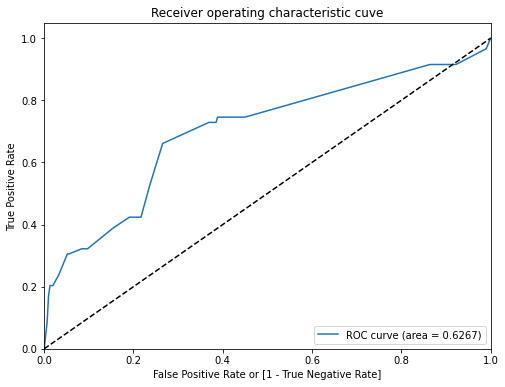

In [86]:
##Plotting the ROC Curve

fpr, tpr, thresholds = metrics.roc_curve(DTC_test_pred.actual, DTC_test_pred.predicted_prob,drop_intermediate=False)


plt.figure(figsize=(8, 6))
plt.plot( fpr, tpr, label='ROC curve (area = %0.4f)' % roc_score_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic cuve')
plt.legend(loc="lower right")
plt.show()

From the above plot, depending on the value we place on true positive and tolerance <br>for false positive rate we can choose a weight.

<br>Depending on what we want to see, we can increase the true positive rate by adjusting the probability cutoff for classification to find the people<br>
who are leaving. or vice versa.

<br>but there is a drawback to this, in doing so, we can also increase the false positivity rate.
<br> hence its best we find the best suited weight for this.

In [89]:
#Lets check the Recall and precision score.
print(f"Recall Score:",round(metrics.recall_score(DTC_test_pred.actual,DTC_test_pred.predicted) * 100,3))
print(f"Precision Score:",round(metrics.precision_score(DTC_test_pred.actual,DTC_test_pred.predicted) * 100,3))

Recall Score: 30.508
Precision Score: 52.941


In [90]:
print(metrics.classification_report(DTC_test_pred.actual,DTC_test_pred.predicted))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       309
           1       0.53      0.31      0.39        59

    accuracy                           0.85       368
   macro avg       0.70      0.63      0.65       368
weighted avg       0.82      0.85      0.83       368



<h3><font color='green'>Summary:

<h4><font color='brown'>
<br><br>1. The Dataset was imported and analysed for missing values, and used the info() function to check the datatype of the columns. 
    
<br><br>2. The Datatype wasnt enough to say if a column was categorical or continious, as there were a lot of columns with ratings.
<br><br>3. We Understood the behaviour of the columns on the target, with the use of visualisation techniques and some common logic. The columns that i was unclear about, i ran an individual analysis, rest were visualised using a heatmap.
<br><br>4. Next we saw if the dataset was Balanced, it was imbalanced. We can later check if the same proportion exists in the training and testing data.
<br><br>5. Segregated the Categorical and Continious data columns.
<br><br>6. Next, we use the function get_dummies() to indicator values for better classification.
<br><br>7. Next we split the data into training and testing data, and then we check, to find the imbalance is in the same proportion in both training and testing data.
<br><br>8. Used the Decision Tree model for this dataset. began with initialising the pipeline, checked the Cross validation score  of the pipeline. where we found an accuracy of  84.3%
<br><br>9. Began hyper parameter tuning for better accuracy/efficiency/both. Then checked the Cross validation score using Grid search CV, where we got the best score of 84.75%
<br><br>10. We Visualised the Tree. Uploaded a higher resolution in the folder for your reference.
<br><br>11. Finally, conducted Model Evaluation. the following are the results.

In [161]:
print(metrics.classification_report(DTC_test_pred.actual,DTC_test_pred.predicted))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       309
           1       0.53      0.31      0.39        59

    accuracy                           0.85       368
   macro avg       0.70      0.63      0.65       368
weighted avg       0.82      0.85      0.83       368



<h4><font color='brown'>
As we can see, in the Macro Average row, we have a Recall pf 0.63,Precision of 0.70 and f1 score of 0.65
    